# 3. 단순 선형 회귀 - Gradient descent

---

## 학습 목표
- gradient descent의 문제점을 해결할 수 있는 방법에 대해서 학습합니다.
- gradient descent를 사용한 단순 선형 회귀 알고리즘을 구현합니다.

## 목차

### 1. Gradient descent 보완
1. Local minima 문제
2. Learning rate 문제
3. 초기 값 문제

### 2. Gradient descent를 사용한 단순 선형 회귀
1. 단순 선형 회귀 class 구현
2. Gradient descent 보완


---

## 1. Gradient descent 보완

### 1-1. Local minima 문제

앞서 2장에서 살펴 보았던 gradient descent 문제점 3가지를 다루며 해결책을 생각해 봅니다.

#### 문제 정의

Local minima 문제는 실제 최소 값(global minima) 외에 지역 최소 값(local minima)이 존재한다면 gradient descent는 실제 최소 값에 도달하지 못하고 지역 최소 값에서 멈추는 것을 의미합니다.

<img src="img/3-1-2.png" width="50%" height="50%" title="local1" alt="local1"></img>

Gradient descent 업데이트 룰을 따르게 된다면 어느 위치에 있던 다음 업데이트 방향은 내려가는 방향으로 잡히게 됩니다.

위 그림에서 3번 위치에서 시작하게 된다면 큰 문제 없이 global minima 에 도착합니다.

하지만 1, 2번 위치에서 움직이게 되면 local minima에 도착하게 됩니다.

#### 해결 방법

MSE로 정의된 Loss 함수이기에 선형 함수의 파라라미터에 대해서 정리하면 다음과 같습니다.

##### loss 함수

> $$\begin{aligned}
Loss(w_0, w_1)&=\frac{1}{N}\sum_{i=1}^{N}(y_i-f(x_i))^{2} \\
&=\frac{1}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))^{2}
\end{aligned}$$

기울기 값 $w_1$에 대한 Loss 값은 2차 함수 관계 있기에 아래의 그림과 같은 형태로 그려집니다.

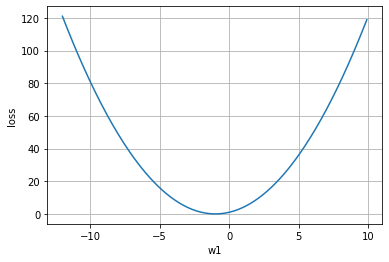

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w1 = np.arange(-12,10,0.1)

loss_w1 = 1*w1**2 + 2*w1 + 1

plt.plot(w1, loss_w1)
plt.xlabel('w1')
plt.ylabel('loss')
plt.grid()
plt.show()

2차 함수의 특성상 local minima 지점이 생길 수 없기에 gradient descent 과정을 통하여 항상 global minima를 찾을 수 있습니다.

y 절편에 대해서도 같은 방식으로 증명이 가능합니다.

하지만, Loss 함수가 MSE가 아닌 다른 함수로 정의가 되면 이야기가 달라집니다.

만약 Loss 함수가 아래와 같이 정의된다면

##### 기울기의 4차식 형태 loss 함수

> $$\begin{aligned}
Loss(w_0, w_1)&=\frac{1}{N}\sum_{i=1}^{N}(y_i-f(x_i))^{4} \\
&=\frac{1}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))^{4}
\end{aligned}$$

기울기에 대해서 4차 함수가 됩니다. 4차 함수는 2개의 local minima와 1개의 global minima를 가질 수 있기에 문제가 생길 수 있습니다.

따라서 선형 회귀 문제에서 Loss 함수를 MSE로 잡는 것은 오차를 양수로 표현하는 것 이외로 local minima 문제를 해결한다는 장점이 있습니다.

만일 비선형 회귀 문제나 Loss 함수가 비선형인 문제를 다룰 경우에는 local minima를 해결하기 위하여 stochastic gradient descent (SGD) 방식을 쓰거나 다양한 최적화 기법을 통하여 해결합니다.

---

### 1-2. Learning rate 문제

#### 문제 정의

Learning rate 설정은 경사 방향으로 얼마나 많이 움직일 것인가를 의미합니다.

어떤 문제가 생기는지 알아보기 위해서 먼저 Learning rate가 너무 높이 설정된 경우를 살펴 봅시다.

<img src="img/3-1-3.png" width="50%" height="50%" title="lr1" alt="lr1"></img>

Learning rate가 너무 높이 설정 되었다면 위 그림과 같이 Global minima 지점을 지나 다른 곳으로 이동합니다.

움직이는 지점에서의 방향은 gradient 값으로 아래로 미끄러졌지만 이동 거리가 너무 길기에 내려갔다가 다시 올라가는 현상이 벌어지게 됩니다.

2번째 이동했던 지점에서 만일 learning rate를 줄일 수 있었다면 Global minima 에 도착할 수도 있었을 것입니다.

이번엔 Learning rate가 너무 낮게 설정된 경우를 살펴 봅시다.

<img src="img/3-1-4.png" width="50%" height="50%" title="lr2" alt="lr2"></img>

Learning rate가 너무 낮게 설정되었다면 위 그림과 같이 매우 느린 움직임으로 Global minima에 다가가고 있음을 볼 수 있습니다.

Learning rate가 너무 높아서 Global minima를 지나칠 일은 없지만 너무 작은 값을 값게 되면 매우 많은 이동이 필요하게 됩니다.

이는 계산양 증가라는 문제를 부를 수 있습니다.

#### 해결 방법

Learning rate가 너무 낮을 때에는 높이고 너무 높은 경우에는 낮게하는 유동적 조절이 필요합니다.

이를 해결하는 방식으로는 momentum, adam 과 같은 방식이 있지만 이 내용들은 신경망 학습 부분에서 제대로 다루겠습니다.

위 방식 대신에 간단한 해결 방법을 알아 봅시다.

**1. iteration 횟수에 따라 learning rate 줄이기**

처음부터 큰 learning rate를 잡고 업데이트 iteration 횟수에 따라 learning rate를 감소시키는 방법입니다.

너무 큰 learning rate의 경우 반복 횟수에 따라 줄어들기에 global minima에 도달할 수 있습니다.

learning rate를 줄이는 방법으로는 아래의 수식처럼 일정 비율로 감소 시키는 방법이 있습니다.

##### learning rate 감소법

> $$[w_{0}^{t+1}, w_{1}^{t+1}] = [w_{0}^{t}, w_{1}^{t}] - \frac{\alpha}{iteration} \triangledown Loss(w_{0}^{t}, w_{1}^{t})$$

$iteration$은 업데이트 횟수를 의미합니다.

기존 고정된 learning rate 보다는 성능이 좋을 수 있지만 이 또한 문제점이 많습니다.

시작 점 위치에 따라 global minima 위치를 벗어나 점점 느리게 수렴할 수 있어 오히려 반복 횟수가 늘어날 수 있습니다.

**2. Loss 값 증가시 learning rate 줄이기**

`1. iteration 횟수에 따라 learning rate 줄이기` 에서 소개한 방법은 learning rate가 iteration 횟수에만 영향을 받아 줄어드는 단점이 있었습니다.

이를 보완하기 위해서 Loss 값이 증가하는 경우에만 learning rate를 줄여 빠른 global minima를 향하여 빠른 속도로 이동할 수 있도록 합니다.

이 방법은 아래와 같은 알고리즘으로 구성할 수 있습니다.

1. 파라미터 초기화
2. 반복문 시작 (업데이트 된 loss 값의 차이가 매우 적을 때 까지 반복)

    1) gradient 계산
    
    2) 파라미터 업데이트 계산
    
    3) 전 파라미터로 계산 된 loss 값과 현재 파라미터의 loss 값 계산 후 비교하여 현재 파라미터의 loss 값이 더 크다면 learning rate를 줄임


##### <예제 1> learning rate 문제 해결 알고리즘

`2-2. <예제 2> gradient descent 알고리즘 구현`에서 구현한 gradient descent 알고리즘에서 learning rate 문제를 해결해 봅시다.

In [6]:
import numpy as np

# 1차 선형 모델 함수 정의
def linear_model(w_0, w_1, feature_data):
    f_x = w_0 + w_1*feature_data
    return f_x

# loss 함수 정의
def loss(f_x, label_data):
    error = label_data - f_x
    ls = np.mean(error**2)
    return ls

# gradient 함수 정의
def gradient(w0, w1, feature_X, label_Y):
    
    gradient_w0 = -2/(feature_X.size) * np.sum(label_Y - (w0+w1*feature_X))
    gradient_w1 = -2/(feature_X.size) * np.sum((label_Y - (w0+w1*feature_X))*(feature_X))
    
    return np.array([gradient_w0, gradient_w1])

# 학습용 데이터 설정
feature_data = np.array([1,2,3,4]).reshape((-1,1))
label_data = np.array([3.1, 4.9, 7.2, 8.9]).reshape((-1,1))


# 파라미터 초기화
w0 = 0
w1 = 0

# 현재 파라미터로 계산한 loss 값 저장 
loss1 = loss(linear_model(w0, w1, feature_data), label_data)

# 반복 횟수를 세기 위하여 변수 초기화
num_iter = 0

# learning rate 초기화
lr = 1

while True:
    
    num_iter = num_iter + 1
    
    gd = gradient(w0, w1, feature_data, label_data)
        
    w0 = w0 - lr*gd[0]
    w1 = w1 - lr*gd[1]
    
    if loss1 < loss(linear_model(w0, w1, feature_data), label_data):
        print("diverges")
        print("updates learning rate * 50%")
        status = 'diverges'
        lr = lr/2

    if abs(loss1 - loss(linear_model(w0, w1, feature_data), label_data)) < 0.00001:
        print("saturates")
        print("number of iteration : {}".format(num_iter))
        print("loss : {}".format(loss1))
        print("W0 : {}".format(w0))
        print("W1 : {}".format(w1))
        status = 'converges'
        break
        
    loss1 = loss(linear_model(w0, w1, feature_data), label_data)
    


diverges
updates learning rate * 50%
diverges
updates learning rate * 50%
diverges
updates learning rate * 50%
diverges
updates learning rate * 50%
saturates
number of iteration : 92
loss : 0.016010926554666734
W0 : 1.0612134243018572
W1 : 1.9831921656317235


---

### 1-3. 초기 값 문제

#### 문제 정의

선형 회귀 파라미터의 초기값 설정은 목적지에서 얼마나 가까운 곳에서 시작을 하는 것을 의미합니다.

<img src="img/3-1-5.png" width="50%" height="50%" title="ini1" alt="ini1"></img>

위 그림은 2가지 시작 점(initial point)에 따른 gradient descent 과정을 보여주고 있습니다.

initial point 1에 비해서 inital point 2는 global minima와 가깝기에 보다 빠르게 도달할 수 있음을 알 수 있습니다.

당연하게도 시작 점을 global minima와 가깝게 잡을수록 보다 빠르게 gradient descent 과정을 마칠 수 있습니다.

하지만 global minima 가 어딨는지를 모르기 때문에 시작 점 또한 어디서부터 시작해야 하는지 기준이 없습니다.

#### 해결 방법

시작 점을 잡는 방식으로는 가우시안 샘플링과 같은 방식이 있지만 이 내용들 또한 신경망 학습 부분에서 제대로 다루겠습니다.

위 방식 대신에 간단한 해결 방법을 알아 봅시다.

**사전 정보 이용**

일반적으로 시작 점 위치를 잡을 때는 랜덤하게 값을 뽑아서 gradient descent 방식을 수행하게 됩니다.

하지만 탐색적 데이터 분석을 통하여 특성 데이터와 레이블 데이터 간의 상관 관계를 출력했다면 global minima 위치에 대한 정보를 어느정도 얻을 수 있습니다.

<img src="img/3-1-6.png" width="40%" height="40%" title="ini2" alt="ini2"></img>

위 그림과 같이 특성 데이터와 레이블 데이터 간의 분포를 알 수 있다면 간단하게 기울기가 양수 값을 가질 것이라는 정보를 얻을 수 있습니다.

이렇게 데이터가 가지고 있는 상관 관계를 통한 사전 정보를 통하여 시작 점의 위치를 대략적으로 유추할 수 있고 이것은 시작 점을 잡는데 큰 도움이 됩니다.

##### <예제 2> 초기 값 문제 해결 방식

`<예제 1> learning rate 문제 해결 알고리즘`에서 수행한 코드를 바탕으로 `w0, w1`을 초기화를 어떻게 설정하냐에 따라 변하는 iteration 수를 비교해봅시다.

In [8]:
import numpy as np

# 1차 선형 모델 함수 정의
def linear_model(w_0, w_1, feature_data):
    f_x = w_0 + w_1*feature_data
    return f_x

# loss 함수 정의
def loss(f_x, label_data):
    error = label_data - f_x
    ls = np.mean(error**2)
    return ls

# gradient 함수 정의
def gradient(w0, w1, feature_X, label_Y):
    
    gradient_w0 = -2/(feature_X.size) * np.sum(label_Y - (w0+w1*feature_X))
    gradient_w1 = -2/(feature_X.size) * np.sum((label_Y - (w0+w1*feature_X))*(feature_X))
    
    return np.array([gradient_w0, gradient_w1])

# 학습용 데이터 설정
feature_data = np.array([1,2,3,4]).reshape((-1,1))
label_data = np.array([3.1, 4.9, 7.2, 8.9]).reshape((-1,1))


# 파라미터 초기화
"""
feature 정보를 보고 대충의 파라미터 값을 예측하여 초기화
기울기는 양수이지만 큰 폭은 아니기에 1로 가정
y절편 또한 1로 가정
"""
w0 = 1
w1 = 1

# 현재 파라미터로 계산한 loss 값 저장 
loss1 = loss(linear_model(w0, w1, feature_data), label_data)

# 반복 횟수를 세기 위하여 변수 초기화
num_iter = 0

# learning rate 초기화
lr = 1

while True:
    
    num_iter = num_iter + 1
    
    gd = gradient(w0, w1, feature_data, label_data)
        
    w0 = w0 - lr*gd[0]
    w1 = w1 - lr*gd[1]
    
    if loss1 < loss(linear_model(w0, w1, feature_data), label_data):
        print("diverges")
        print("updates learning rate * 50%")
        status = 'diverges'
        lr = lr/2

    if abs(loss1 - loss(linear_model(w0, w1, feature_data), label_data)) < 0.00001:
        print("saturates")
        print("number of iteration : {}".format(num_iter))
        print("loss : {}".format(loss1))
        print("W0 : {}".format(w0))
        print("W1 : {}".format(w1))
        status = 'converges'
        break
        
    loss1 = loss(linear_model(w0, w1, feature_data), label_data)
    


diverges
updates learning rate * 50%
diverges
updates learning rate * 50%
diverges
updates learning rate * 50%
diverges
updates learning rate * 50%
saturates
number of iteration : 58
loss : 0.016019553663658693
W0 : 1.1394225687172648
W1 : 1.9565915191845342


---